✅ Data Loaded Successfully!
            fault_type fault_location_latitude_longitude  voltage_v  \
0        Line Breakage              (34.0522, -118.2437)       2200   
1  Transformer Failure                (34.056, -118.245)       1800   
2          Overheating               (34.0525, -118.244)       2100   
3        Line Breakage                (34.055, -118.242)       2050   
4  Transformer Failure               (34.0545, -118.243)       1900   

   current_a  power_load_mw  temperature_°c  wind_speed_km/h  \
0        250             50              25               20   
1        180             45              28               15   
2        230             55              35               25   
3        240             48              23               10   
4        190             50              30               18   

  weather_condition maintenance_status component_health  \
0             Clear          Scheduled           Normal   
1             Rainy          Completed    

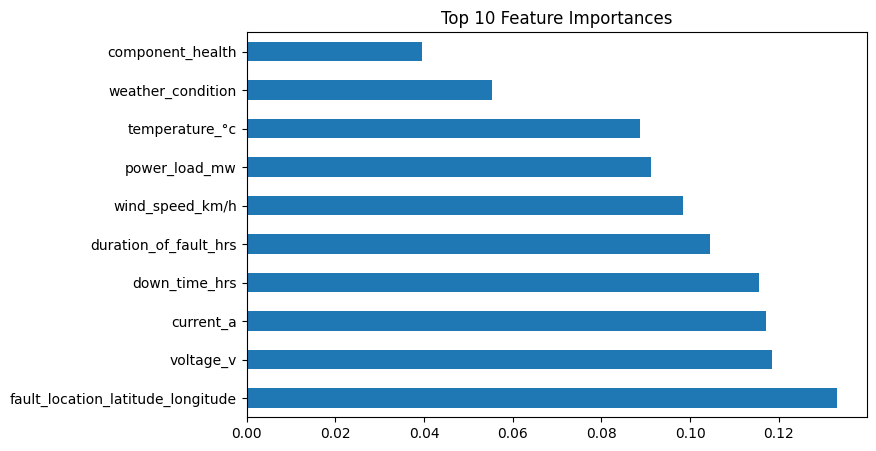

In [7]:
# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2️⃣ Load Data
df = pd.read_csv("fault_data.csv")  # replace with your file path

# 3️⃣ Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace(',', '')

# 4️⃣ Check data
print("✅ Data Loaded Successfully!")
print(df.head())

# 5️⃣ Handle Categorical Columns (Label Encoding)
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# 6️⃣ Feature & Target
X = df.drop('fault_type', axis=1)
y = df['fault_type']

# 7️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8️⃣ Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 9️⃣ Predictions
y_pred = model.predict(X_test)

# 🔟 Evaluation
print("\n🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# 🔟 Feature Importance Plot
plt.figure(figsize=(8,5))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()
